<a href="https://colab.research.google.com/github/Sujan-Sawant/Ninjacart-Vegetable-Image-Classification/blob/main/Ninjakart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

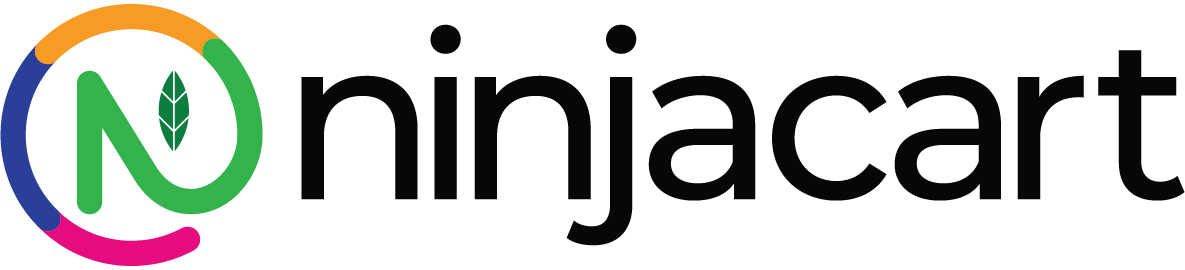

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import random
import sklearn.metrics as metrics
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Install gdown if not already installed
!pip install -U gdown

# Download the file using gdown
import gdown

file_id = "1JWufXFN8PQl5lI_NikCcNrSZN8k8jH_A"
output = "ninjacart_data.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1JWufXFN8PQl5lI_NikCcNrSZN8k8jH_A
From (redirected): https://drive.google.com/uc?id=1JWufXFN8PQl5lI_NikCcNrSZN8k8jH_A&confirm=t&uuid=76dc0778-b887-4757-aed1-b093a45e8642
To: /content/ninjacart_data.zip
100%|██████████| 275M/275M [00:01<00:00, 157MB/s]


'ninjacart_data.zip'

In [ ]:
import zipfile

with zipfile.ZipFile("ninjacart_data.zip", 'r') as zip_ref:
    zip_ref.extractall("ninjacart_data")


In [ ]:
# Import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os

# List all contents under ninjacart_data
for root, dirs, files in os.walk("ninjacart_data"):
    print(root)


ninjacart_data
ninjacart_data/ninjacart_data
ninjacart_data/ninjacart_data/train
ninjacart_data/ninjacart_data/train/indian market
ninjacart_data/ninjacart_data/train/onion
ninjacart_data/ninjacart_data/train/tomato
ninjacart_data/ninjacart_data/train/potato
ninjacart_data/ninjacart_data/test
ninjacart_data/ninjacart_data/test/indian market
ninjacart_data/ninjacart_data/test/onion
ninjacart_data/ninjacart_data/test/tomato
ninjacart_data/ninjacart_data/test/potato


In [ ]:
train_dir = "ninjacart_data/ninjacart_data/train"
test_dir = "ninjacart_data/ninjacart_data/test"


In [ ]:
# Path to training dataset
train_dir = "ninjacart_data/ninjacart_data/train"

# list all directories inside the "train" folder
class_dirs = os.listdir(train_dir)

# initialize dictionaries
image_dict = {}
count_dict = {}

# iterate over all class folders
for cls in class_dirs:
    # get all image paths in the current class folder
    file_paths = glob.glob(f"{train_dir}/{cls}/*")

    # count number of images in this class
    count_dict[cls] = len(file_paths)

    # select a random image from the list
    image_path = random.choice(file_paths)

    # load image using keras utility (PIL image)
    image_dict[cls] = tf.keras.utils.load_img(image_path)


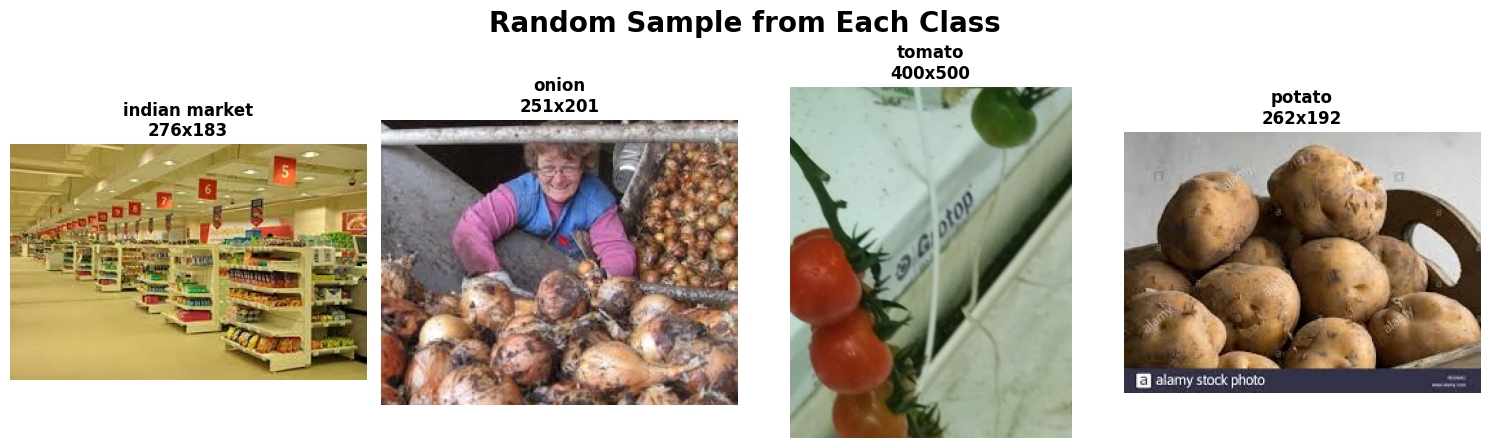

In [ ]:
import matplotlib.pyplot as plt


# Create the figure
plt.figure(figsize=(15, 12))
plt.suptitle("Random Sample from Each Class", fontsize=20, fontweight="bold")

# Iterate over class-image pairs
for i, (cls, img) in enumerate(image_dict.items()):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(img)

    # Set title with class name and image dimensions (Width x Height)
  plt.title(f"{cls}\n{img.size[0]}x{img.size[1]}", fontsize=12,fontweight="bold")

    # Remove axis ticks
  plt.axis("off")

plt.tight_layout()
plt.show()


## View Image Sizes and Distribution

In [ ]:
for cls, img in image_dict.items():
    print(f"{cls}: Image size = {img.size}")  # (width, height)


indian market: Image size = (276, 183)
onion: Image size = (251, 201)
tomato: Image size = (400, 500)
potato: Image size = (262, 192)


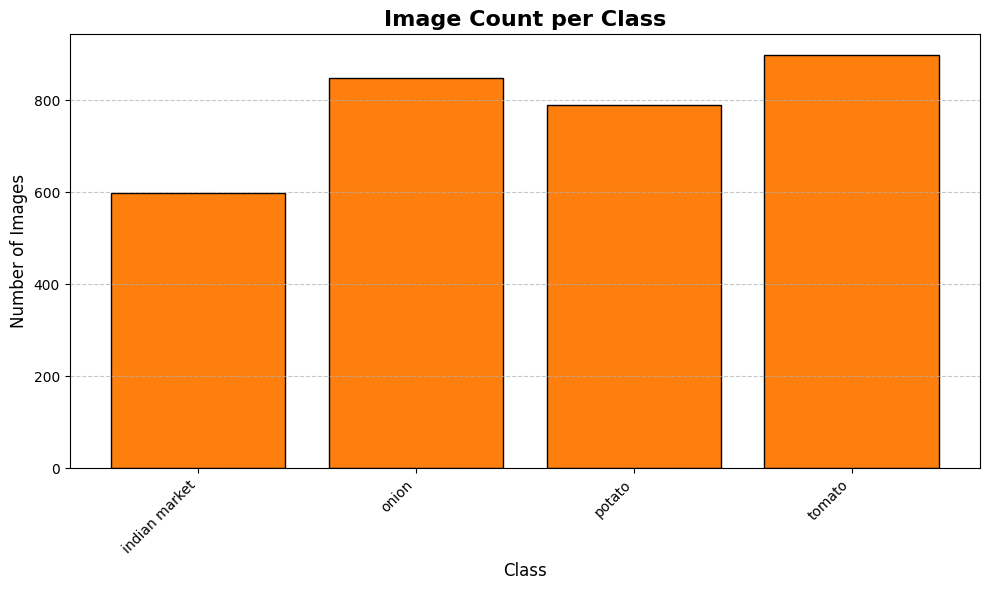

In [ ]:
sorted_classes = sorted(count_dict.keys())
counts = count_dict.values()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_classes, counts, color='#FF7F0E', edgecolor='black')

# Title
plt.title("Image Count per Class", fontsize=16, fontweight='bold')
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## **Preprocessing**

### **Train,Validation and Test Split**

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

# Create training dataset (80%)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Create validation dataset (20%)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Create test dataset separately
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)


Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.
Found 351 files belonging to 4 classes.


### Resizing the data

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Data Processing with resizing and rescaling
data_preprocess = keras.Sequential(
    name="data_preprocess",
    layers=[
        layers.Resizing(IMG_SIZE[0], IMG_SIZE[1]),  # Shape preprocessing
        layers.Rescaling(1.0/255)                   # Value preprocessing (0-1)
    ]
)

# Apply preprocessing to datasets
train_ds = train_dataset.map(lambda x, y: (data_preprocess(x), y))
val_ds   = val_dataset.map(lambda x, y: (data_preprocess(x), y))
test_ds  = test_dataset.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
sample = next(iter(train_ds))[0]

print(sample)

tf.Tensor(
[[[[4.50367659e-01 4.50367659e-01 4.50367659e-01]
   [4.41299051e-01 4.41299051e-01 4.41299051e-01]
   [4.30698544e-01 4.30698544e-01 4.30698544e-01]
   ...
   [7.54473090e-01 7.54473090e-01 7.54473090e-01]
   [7.52941251e-01 7.52941251e-01 7.52941251e-01]
   [7.56556392e-01 7.56556392e-01 7.56556392e-01]]

  [[4.63147521e-01 4.63147521e-01 4.63147521e-01]
   [4.57702279e-01 4.57702279e-01 4.57702279e-01]
   [4.51949328e-01 4.51949328e-01 4.51949328e-01]
   ...
   [7.83117533e-01 7.83117533e-01 7.83117533e-01]
   [7.99947500e-01 7.99947500e-01 7.99947500e-01]
   [8.00673783e-01 8.00673783e-01 8.00673783e-01]]

  [[4.71781194e-01 4.71781194e-01 4.71781194e-01]
   [4.69651639e-01 4.69651639e-01 4.69651639e-01]
   [4.65117335e-01 4.65117335e-01 4.65117335e-01]
   ...
   [8.05399299e-01 8.05399299e-01 8.05399299e-01]
   [8.24807465e-01 8.24807465e-01 8.24807465e-01]
   [8.24807465e-01 8.24807465e-01 8.24807465e-01]]

  ...

  [[3.03109944e-01 3.03109944e-01 3.03109944e-01]
   [2

- Batch size 32
- height 224
- width 224
- channels 3

#  Model Architecture of Vanilla NN

In [ ]:
num_classes = 4
hidden_size_1 = 1024
hidden_size_2 = 256
height= 224
width = 224

model = keras.Sequential(
    name="model_ann",
    layers=[
        layers.Flatten(input_shape=(height, width, 3)), # alternatively, input_shape=next(iter(train_ds))[0].shape[1:]
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

In [ ]:
model.summary()

Model: "model_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   154,141,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,405,124 (589.01 MB)

 Trainable params: 154,405,124 (589.01 MB)

 Non-trainable params: 0 (0.00 B)

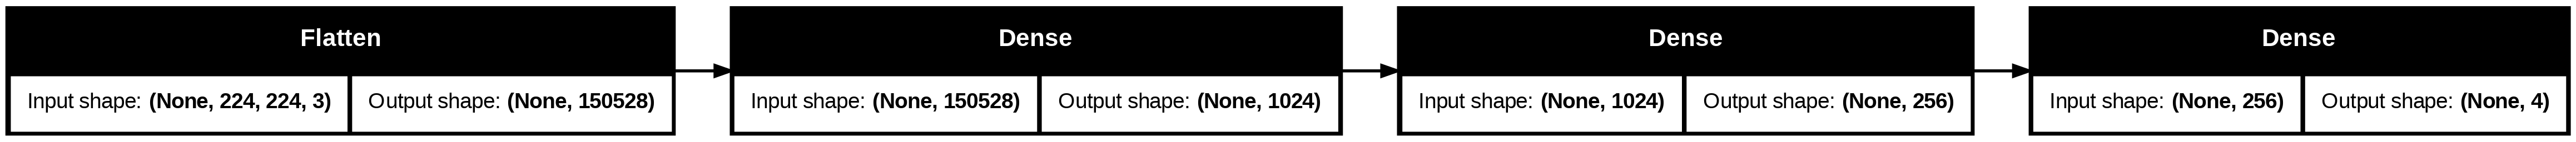

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model_ann.png",
    show_shapes=True,
    rankdir="LR"  # "TB" for top-bottom (default), "LR" for left-right
)


In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Training and Evaluation with Vanilla NN

In [ ]:
# Lets train for 10 epochs
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.3294 - loss: 82.8399 - val_accuracy: 0.5311 - val_loss: 15.8575
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.5657 - loss: 6.0188 - val_accuracy: 0.4912 - val_loss: 7.8691
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.5972 - loss: 3.5622 - val_accuracy: 0.6380 - val_loss: 2.1812
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - accuracy: 0.6555 - loss: 1.9933 - val_accuracy: 0.5821 - val_loss: 2.2577
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.6063 - loss: 2.1866 - val_accuracy: 0.6220 - val_loss: 1.4970
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.6632 - loss: 1.2335 - val_accuracy: 0.6124 - val_loss: 1.2381
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.6973 - loss: 0.8793 - val_accuracy: 0.5152 - val_loss: 2.2851
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.6922 - loss: 0.9946 - val_accuracy: 0.6204 -

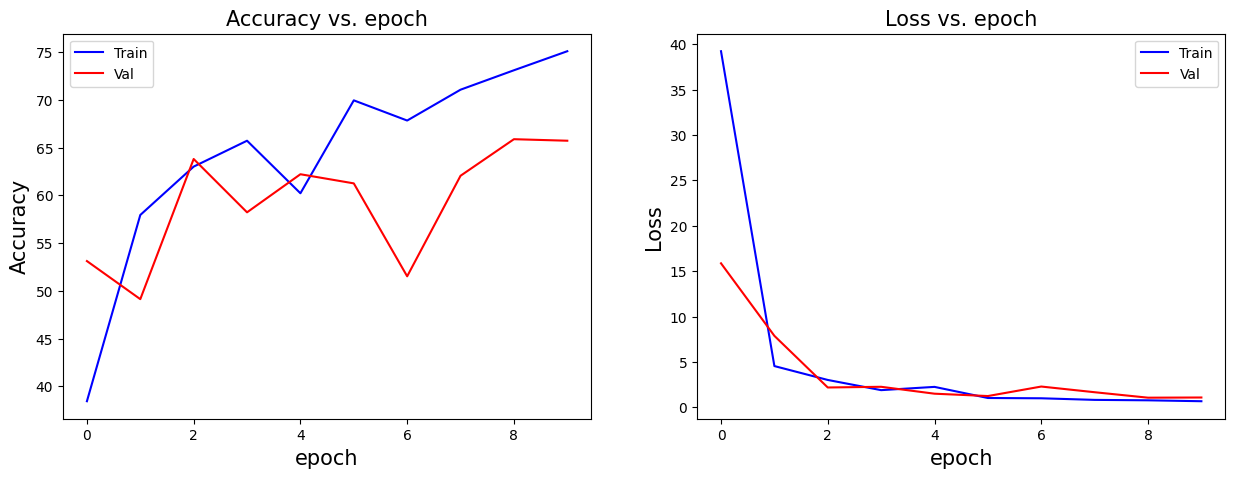

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Predict on test dataset

In [ ]:

from sklearn import metrics
import tensorflow as tf

# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 458ms/step

Test Accuracy: 26.21%



## Let's also plot few samples from test set along with their predicted softmax probabilities.

In [ ]:

def plot_image(pred_array, true_label, img):
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Fix 1: Remove grayscale colormap
  # Fix 2: Convert image to correct dtype
  if img.dtype != np.uint8:
    img = (img * 255).astype("uint8")  # if image is in [0, 1] float32

  plt.imshow(img)  # Don't use cmap for RGB images

  predicted_label = np.argmax(pred_array)
  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel(
      "{} {:2.0f}% ({})".format(
          class_names[predicted_label],
          100 * np.max(pred_array),
          class_names[true_label]
      ),
      color=color
  )



In [ ]:
def plot_value_array(pred_array, true_label):
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks(range(len(pred_array)))
  plt.yticks([])
  thisplot = plt.bar(range(len(pred_array)), pred_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0).numpy()
images = tf.concat([x for x, y in test_ds], axis=0).numpy()
y_pred = model.predict(test_ds)
class_names = test_dataset.class_names


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 468ms/step


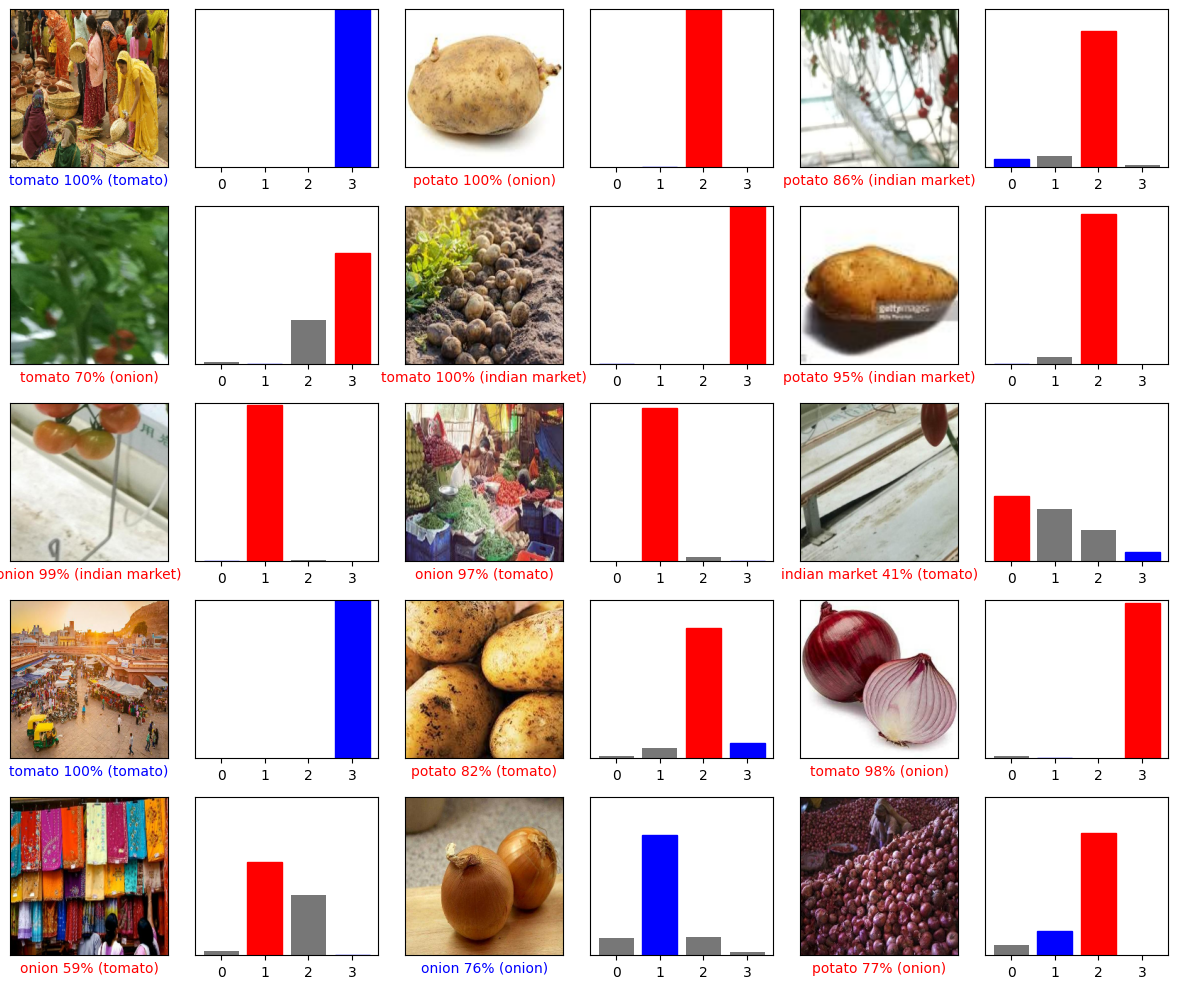

In [ ]:
# Randomly sample 15 test images and plot them
indices = random.sample(range(len(images)), 15)
num_rows = 5
num_cols = 3
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i, index in enumerate(indices):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(y_pred[index], true_categories[index], images[index])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(y_pred[index], true_categories[index])

plt.tight_layout()
plt.show()


# CNN

#### Model Architecture

In [ ]:
# Define number of output classes and hidden layer size
num_classes = 4
hidden_size = 128
height = 224
width = 224

model = keras.Sequential(
    name="model_cnn",
    layers=[
        layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="valid", activation='relu', input_shape=(height, width, 3)),
        layers.MaxPooling2D(pool_size=2, strides=2),

        layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", activation='relu'),
        layers.MaxPooling2D(pool_size=2, strides=2),

        layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="valid", activation='relu'),
        layers.MaxPooling2D(pool_size=2, strides=2),

        layers.Flatten(),
        layers.Dense(units=hidden_size, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)


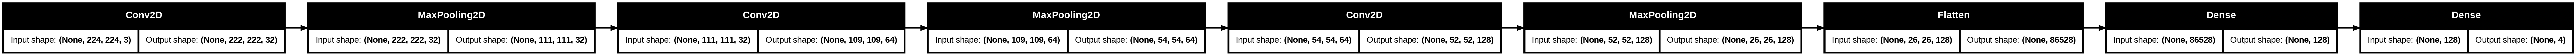

In [ ]:
tf.keras.utils.plot_model(model, to_file="model_cnn.png", show_shapes=True,rankdir="LR")

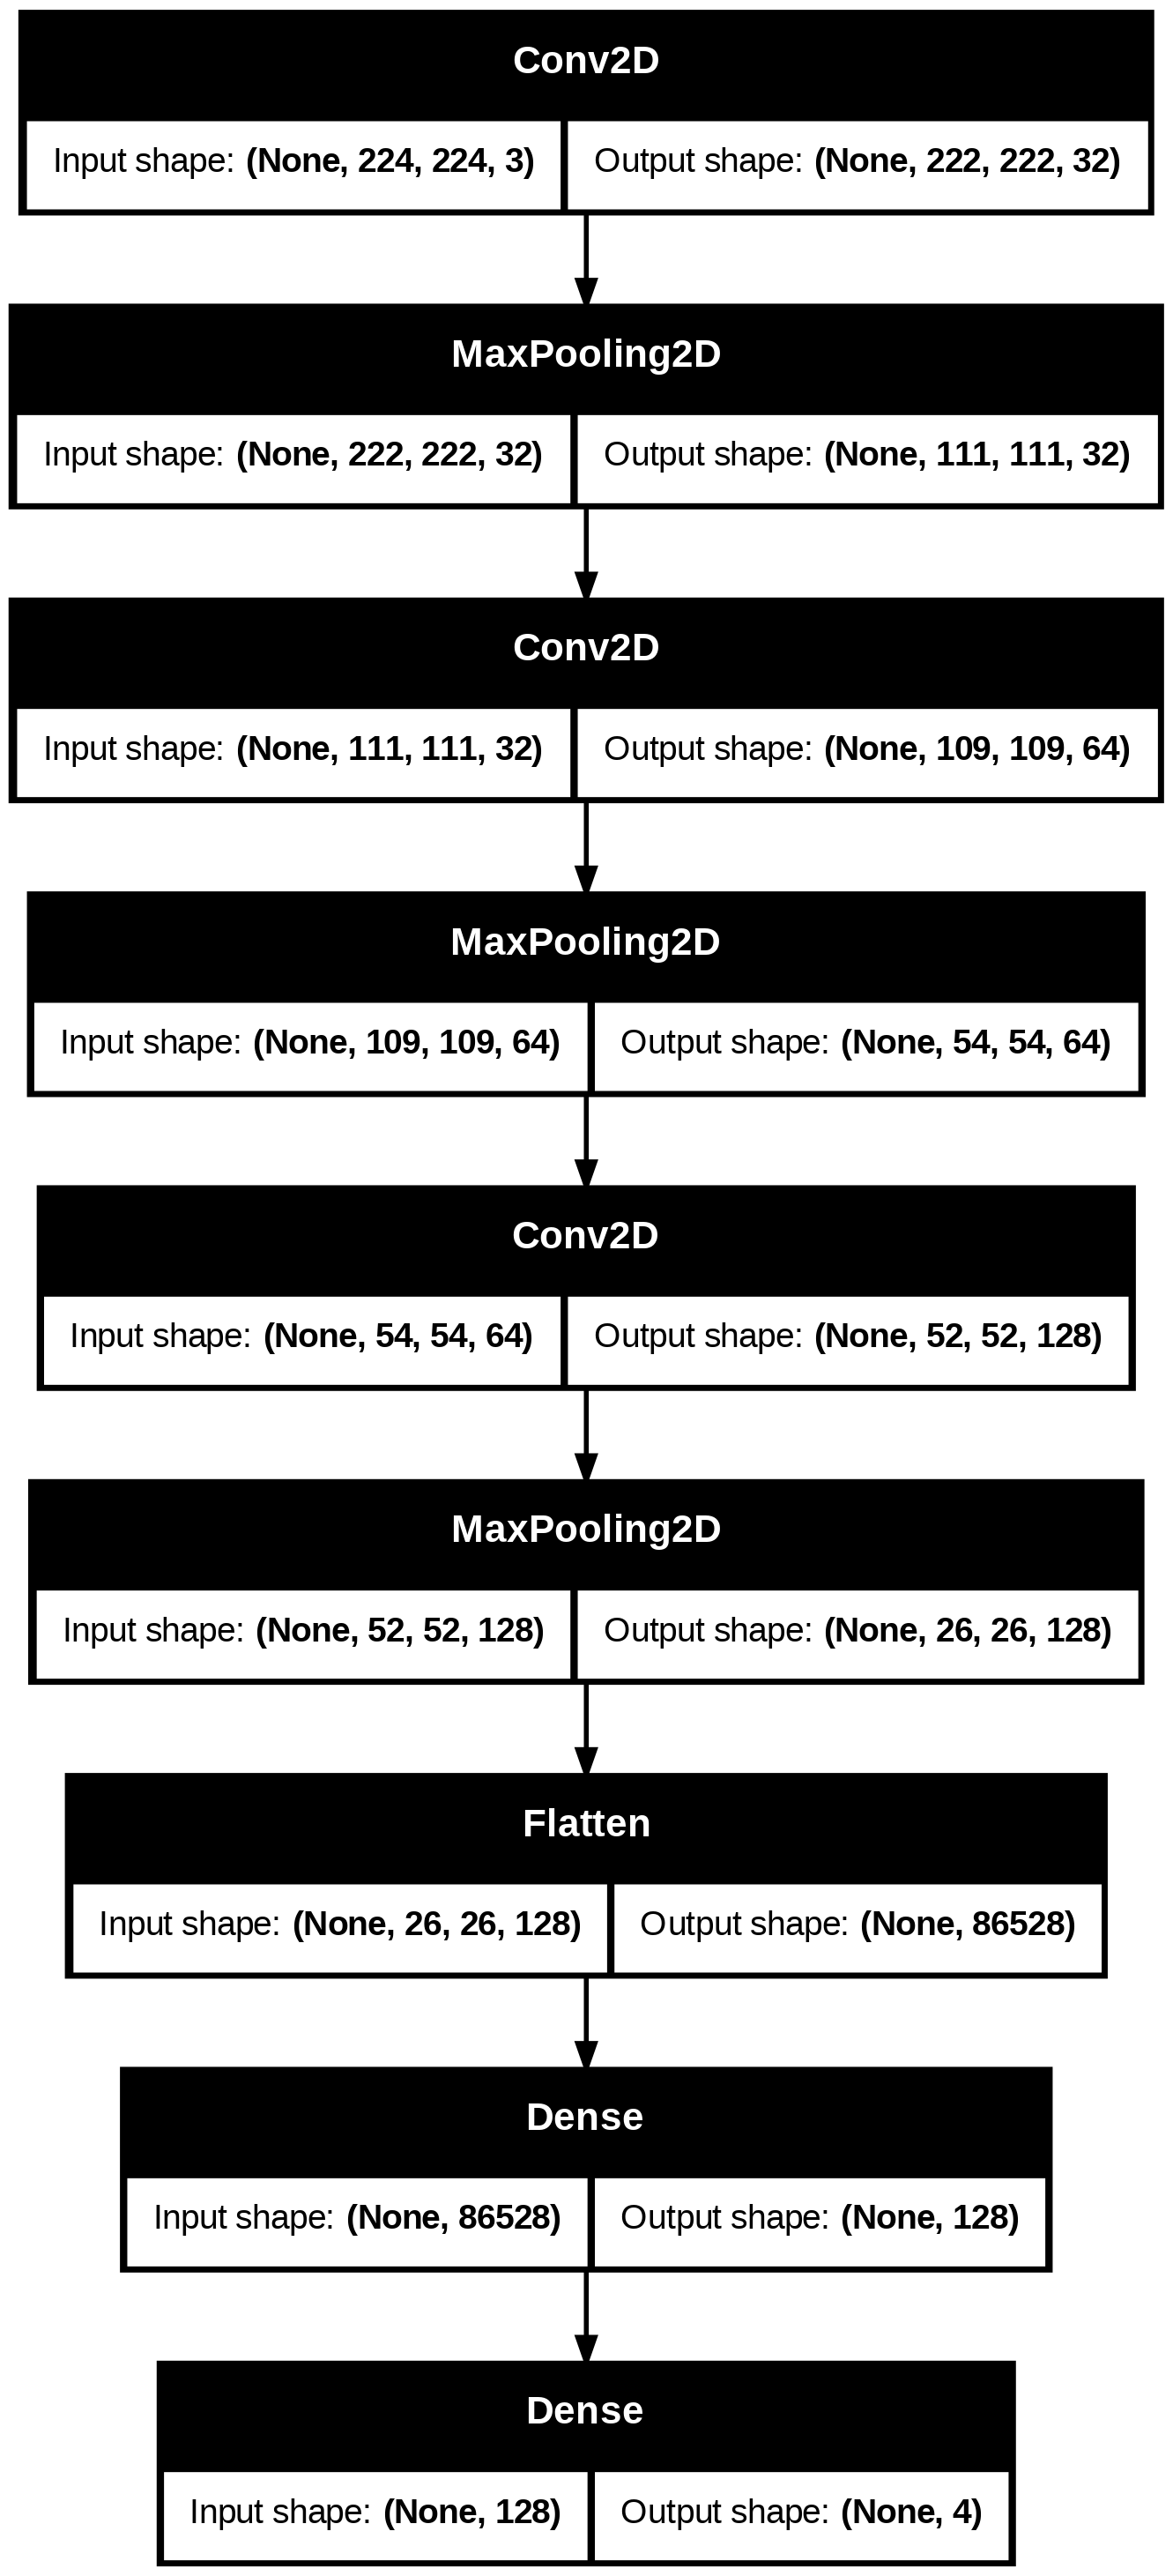

In [ ]:
tf.keras.utils.plot_model(model, to_file="model_cnn.png", show_shapes=True)

In [ ]:
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model with cross-entropy loss and adam optimizer:

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Training and Evaluation with CNNs

#### Training the model for 10 epochs

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.3750 - loss: 1.9817 - val_accuracy: 0.7656 - val_loss: 0.6459
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.7734 - loss: 0.6017 - val_accuracy: 0.8070 - val_loss: 0.5131
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - accuracy: 0.8242 - loss: 0.4646 - val_accuracy: 0.7337 - val_loss: 0.6461
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 344s 4s/step - accuracy: 0.8207 - loss: 0.4702 - val_accuracy: 0.8246 - val_loss: 0.4407
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8757 - loss: 0.3158 - val_accuracy: 0.7512 - val_loss: 0.7970
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.8852 - loss: 0.2937 - val_accuracy: 0.8070 - val_loss: 0.5405
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.9261 - loss: 0.2113 - val_accuracy: 0.8038 - val_loss: 0.6494
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 295s 4s/step - accuracy: 0.9456 - loss: 0.1546 - val_accuracy: 0.8246 - v

- From above result we can inference that
 - Training accuracy goes from 37% - 98%
 - Validation accuracy improved: From 76% to ~80%
 - After epoch 5,training accuracy keeps increasing, so does validation accuracy.
 - Validation loss increases after epoch 5, even though training loss keeps decreasing which is clear sign of overfitting.

### Accuracy and Loss Plots on training + validation datasets

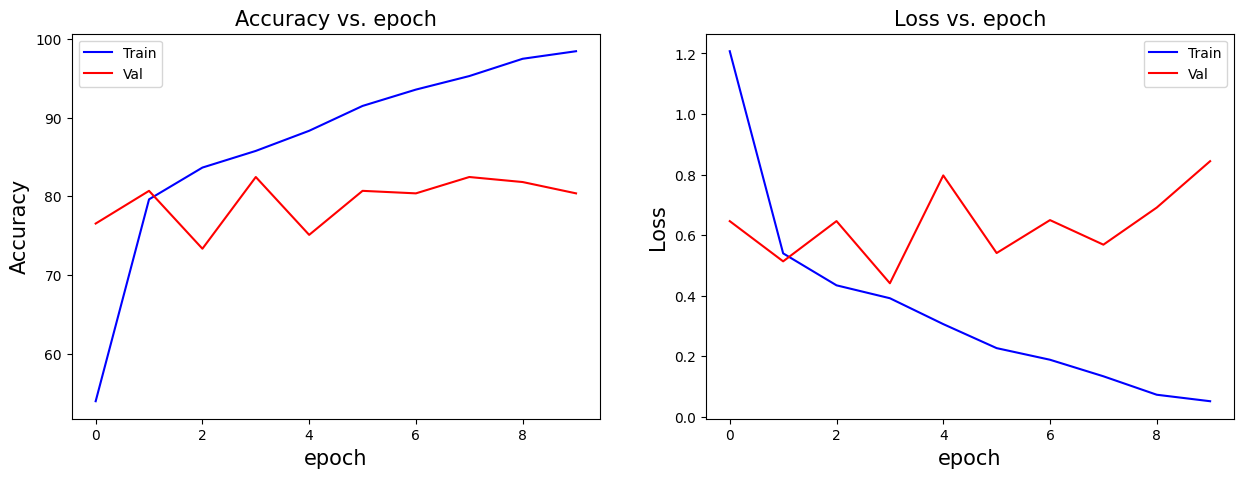

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

### Evaluation on Test Dataset

In [ ]:
from sklearn import metrics
import tensorflow as tf

# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step

Test Accuracy: 23.36%



- Confusion Metric

In [ ]:
def ConfusionMatrix(model, ds, label_list):

    y_pred = model.predict(test_ds)
    # get list of predicted classes by taking argmax of the probabilities(y_pred)
    predicted_categories = tf.argmax(y_pred, axis=1)

    # create list of all "y"s labels, by iterating over test dataset
    true_categories = tf.concat([y for x, y in test_ds], axis=0)
    true_categories = tf.argmax(true_categories, axis=1)
    # generate confusion matrix and plot it
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()



11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


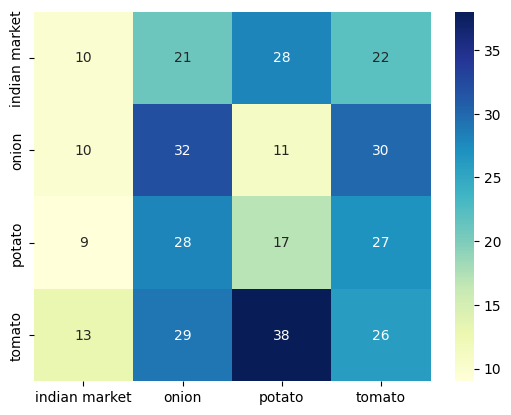

In [ ]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix(model, test_ds, test_dataset.class_names)

In [ ]:
def plot_image(pred_array, true_label, img):
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Fix 1: Remove grayscale colormap
  # Fix 2: Convert image to correct dtype
  if img.dtype != np.uint8:
    img = (img * 255).astype("uint8")  # if image is in [0, 1] float32

  plt.imshow(img)  # Don't use cmap for RGB images

  predicted_label = np.argmax(pred_array)
  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel(
      "{} {:2.0f}% ({})".format(
          class_names[predicted_label],
          100 * np.max(pred_array),
          class_names[true_label]
      ),
      color=color
  )



In [ ]:
def plot_value_array(pred_array, true_label):
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks(range(len(pred_array)))
  plt.yticks([])
  thisplot = plt.bar(range(len(pred_array)), pred_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

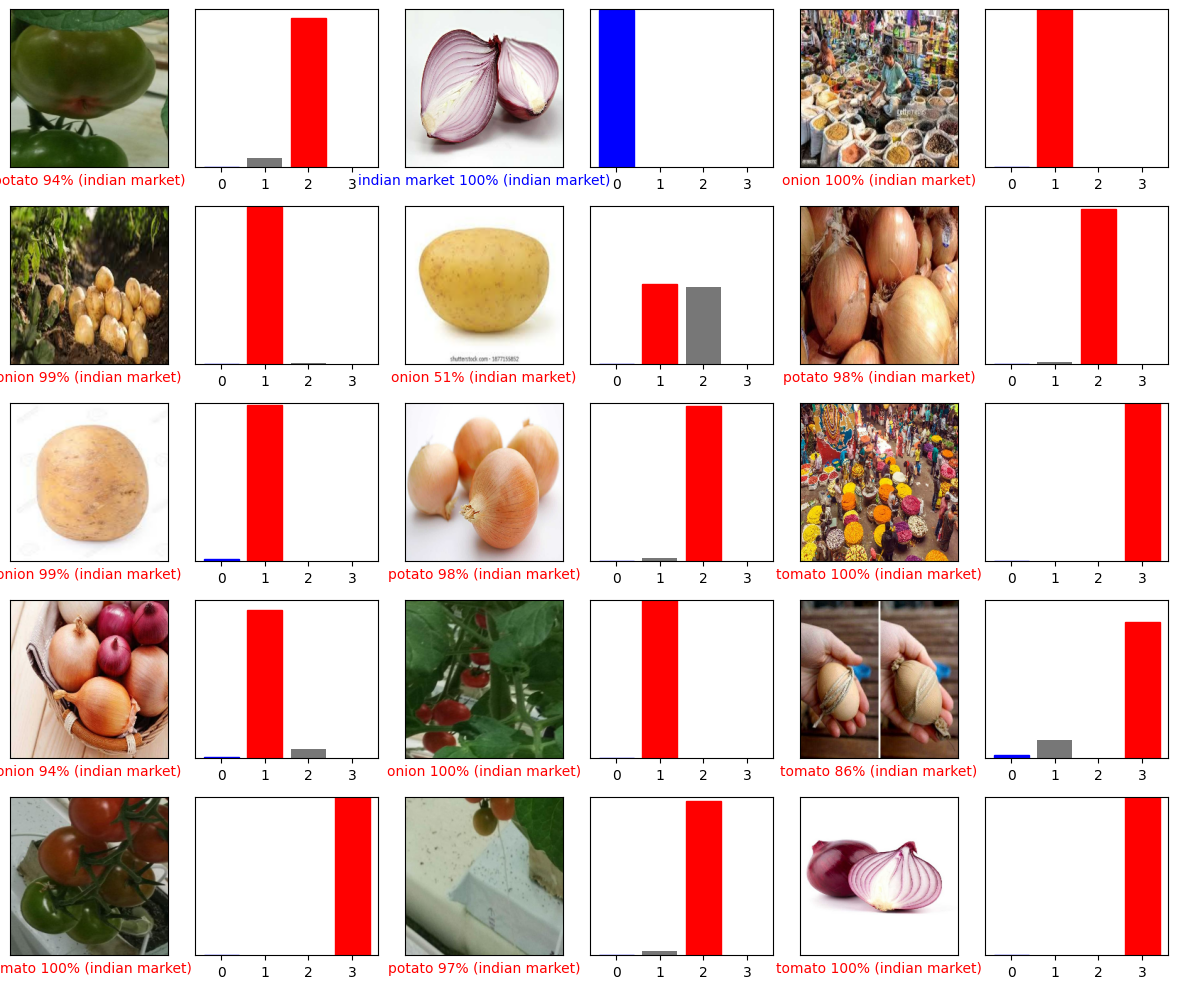

In [ ]:
# Randomly sample 15 test images and plot them
indices = random.sample(range(len(images)), 15)
num_rows = 5
num_cols = 3
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i, index in enumerate(indices):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(y_pred[index], true_categories[index], images[index])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(y_pred[index], true_categories[index])

plt.tight_layout()
plt.show()

In [ ]:

def plot_image(pred_array, true_label, img):
  true_label = np.argmax(true_label)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Convert Tensor to uint8 for display
  img = tf.cast(img * 255, tf.uint8).numpy()

  plt.imshow(img)  # Don't use cmap for RGB
  predicted_label = np.argmax(pred_array)
  color = 'blue' if predicted_label == true_label else 'red'

  plt.xlabel(
      "{} {:2.0f}% ({})".format(
          class_names[predicted_label],
          100 * np.max(pred_array),
          class_names[true_label]
      ),
      color=color
  )


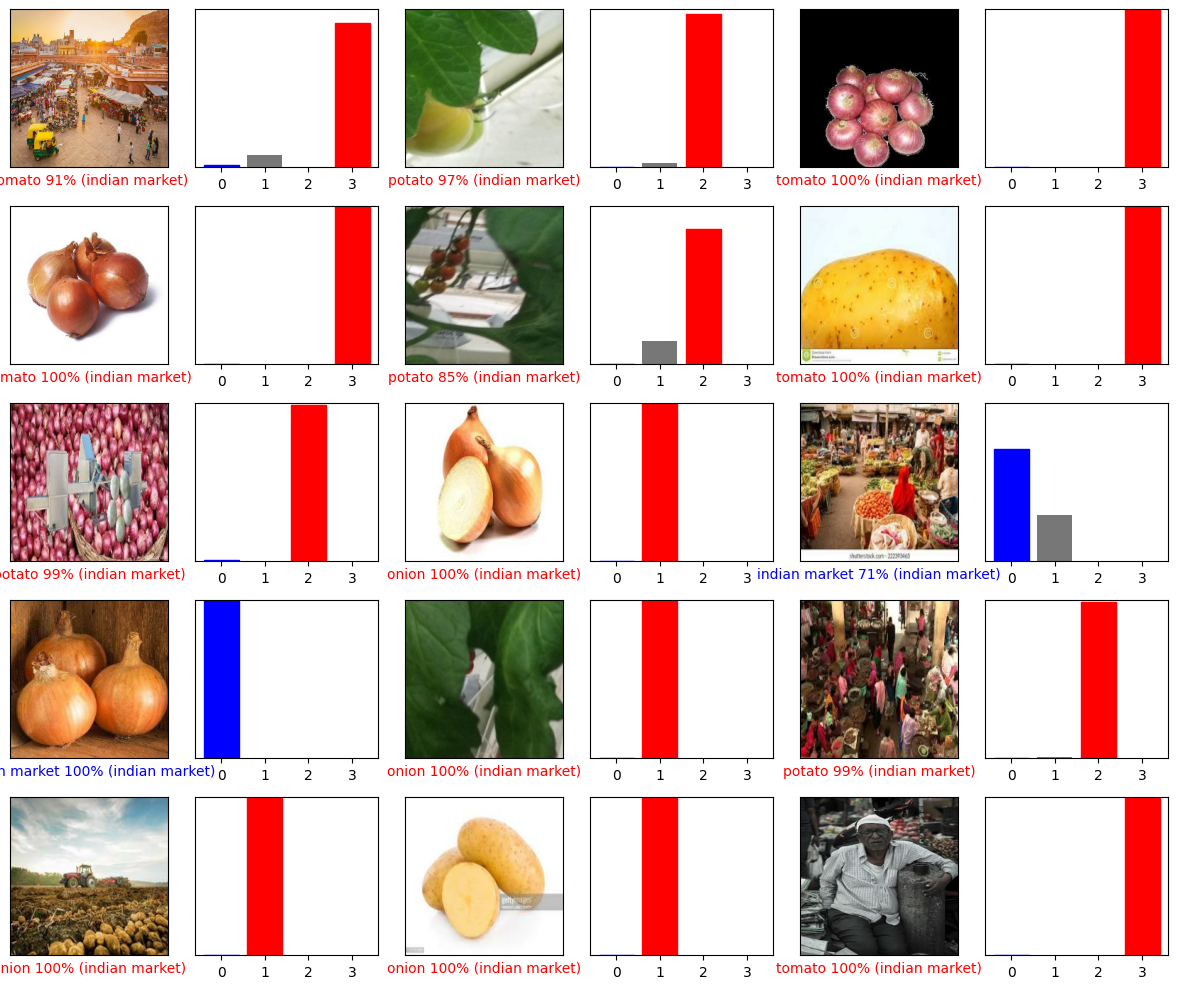

In [ ]:
indices = random.sample(range(len(images)), 15)
num_rows = 5
num_cols = 3
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i, index in enumerate(indices):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(y_pred[index], true_categories[index], images[index])
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(y_pred[index], true_categories[index])

plt.tight_layout()
plt.show()

### **Dealing with Overfitting**

### Modification 1 :
1. Reduce the 3D volume before the flatten layer by using more Convolution blocks.
2. Replace the flatten layer by GlobalAveragePooling2D.

In [ ]:
def rev_model(height=224, width=224):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_1",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", activation='relu', input_shape=(height, width, 3)),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same", activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same", activation='relu'),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, activation='relu'),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = rev_model()
model.summary()

Model: "model_cnn_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,428 (1.75 MB)

 Trainable params: 459,428 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.4120 - loss: 1.2022 - val_accuracy: 0.7560 - val_loss: 0.6651
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7403 - loss: 0.6552 - val_accuracy: 0.8166 - val_loss: 0.5228
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.7982 - loss: 0.5422 - val_accuracy: 0.8182 - val_loss: 0.4824
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8082 - loss: 0.4863 - val_accuracy: 0.8198 - val_loss: 0.4525
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8059 - loss: 0.4934 - val_accuracy: 0.8246 - val_loss: 0.4518
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7870 - loss: 0.5117 - val_accuracy: 0.8086 - val_loss: 0.4826
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8162 - loss: 0.4700 - val_accuracy: 0.8070 - val_loss: 0.4884
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.8158 - loss: 0.4901 - val_accuracy: 0.8166 - v

-- Plot Accuracy

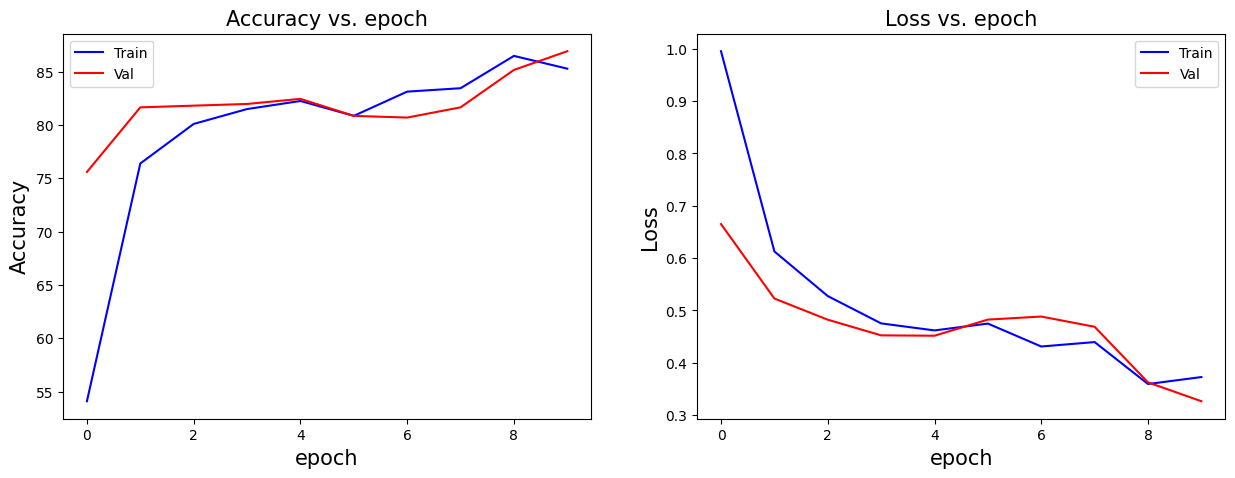

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Prediction on test dataset

In [ ]:
# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 755ms/step

Test Accuracy: 22.79%



## Modification 2 :
1. Add Batch Normalization after every Conv2D and Dense layers.
2. Add Dropout after Dense layers

In [ ]:
def rev_model1(height=224, width=224):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_2",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same"),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = rev_model1()
model.summary()

Model: "model_cnn_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             

 Total params: 462,436 (1.76 MB)

 Trainable params: 460,932 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
epochs = 15
model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.6398 - loss: 1.0723 - val_accuracy: 0.4402 - val_loss: 1.4141
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.7391 - loss: 0.7312 - val_accuracy: 0.2935 - val_loss: 4.0588
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.7942 - loss: 0.5800 - val_accuracy: 0.4561 - val_loss: 2.0441
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.7926 - loss: 0.5564 - val_accuracy: 0.5327 - val_loss: 1.6376
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.8116 - loss: 0.4925 - val_accuracy: 0.5965 - val_loss: 1.1806
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.8373 - loss: 0.3935 - val_accuracy: 0.6730 - val_loss: 0.9169
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.8636 - loss: 0.3835 - val_accuracy: 0.7225 - val_loss: 0.7011
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.8591 - loss: 0.3655 - val_accuracy: 0.7608 - v

## Plot Accuracy

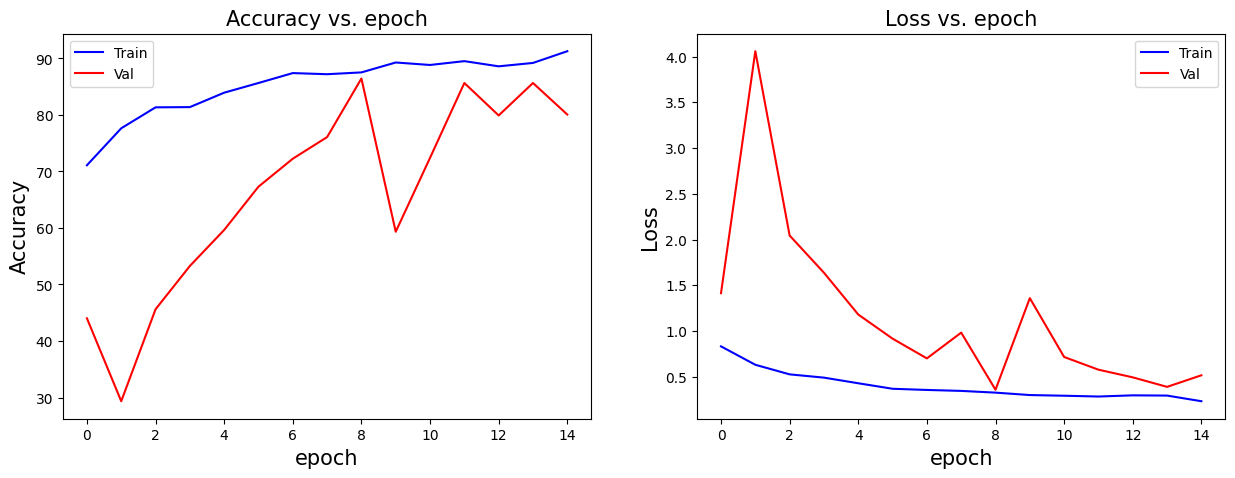

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Prediction on test dataset

In [ ]:
# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step

Test Accuracy: 24.50%



## Modification 3 :      
1. Use Early stopping

In [ ]:
def compile_train_v2(model, train_ds, val_ds, epochs=10, ckpt_path="/tmp/checkpoint.weights.h5"):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        keras.callbacks.ModelCheckpoint(ckpt_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=callbacks)
    return model_fit

In [ ]:
model = rev_model1()
model_fit = compile_train_v2(model, train_ds, val_ds, epochs=10) #50

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.6595 - loss: 1.0496 - val_accuracy: 0.4163 - val_loss: 1.2558 - learning_rate: 0.0010
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.7616 - loss: 0.6764 - val_accuracy: 0.3254 - val_loss: 2.6535 - learning_rate: 0.0010
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.7674 - loss: 0.6780 - val_accuracy: 0.4466 - val_loss: 1.6706 - learning_rate: 0.0010
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.8125 - loss: 0.4732 - val_accuracy: 0.3907 - val_loss: 2.9197 - learning_rate: 0.0010
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.8232 - loss: 0.4584 - val_accuracy: 0.5965 - val_loss: 1.3455 - learning_rate: 0.0010
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.8429 - loss: 0.4090 - val_accuracy: 0.6762 - val_loss: 0.9707 - learning_rate: 0.0010
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.8352 - loss: 0.4696 - val_acc

below is the result for

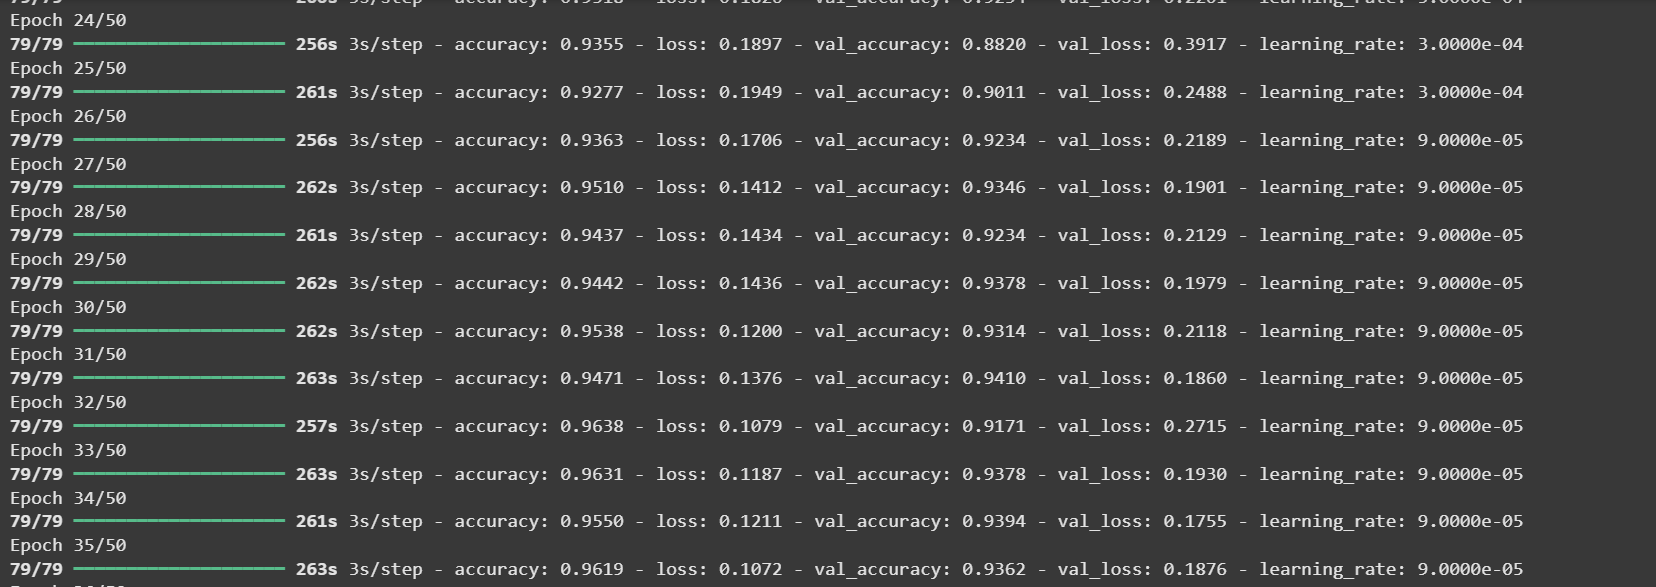

## Plot Accuracy Graph

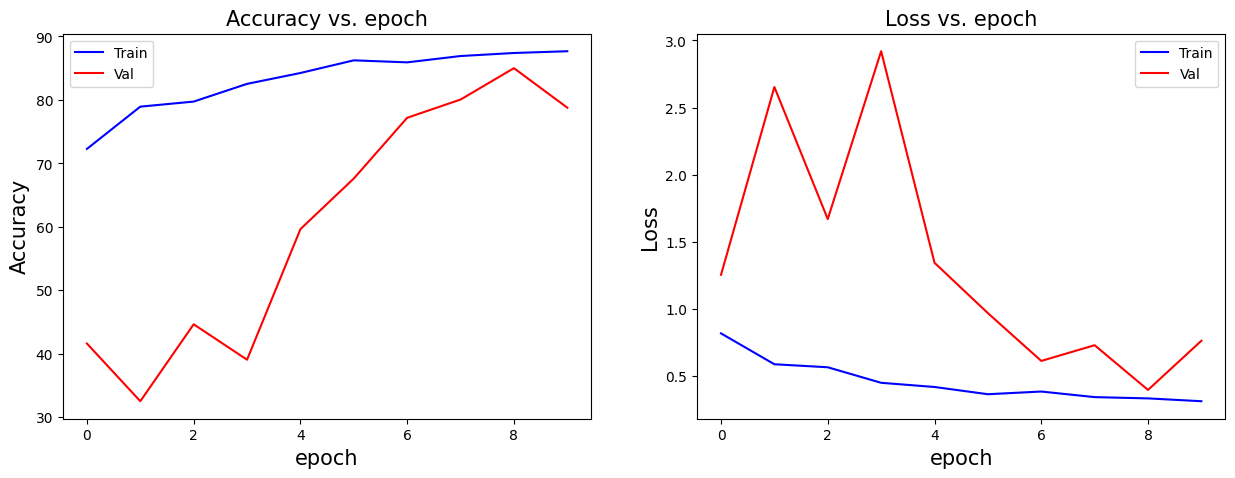

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Prediction on test dataset

In [ ]:
# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 841ms/step

Test Accuracy: 29.06%



## Modification 4 :      
1. Add L2 regularization to Conv2D and Dense layers

In [ ]:
from tensorflow.keras import regularizers


In [ ]:
def rev_model2(height=224, width=224):
    num_classes = 4
    hidden_size = 256

    model = keras.Sequential(
        name="model_cnn_3",
        layers=[
            layers.Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(height, width, 3),
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=32, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=64, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=128, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(),
            layers.Conv2D(filters=256, kernel_size=3, padding="same",
                            kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            # layers.MaxPooling2D(),
            # layers.Flatten(),
            layers.GlobalAveragePooling2D(),
            layers.Dense(units=hidden_size, kernel_regularizer=regularizers.l2(1e-3)),
            layers.Activation("relu"),
            layers.BatchNormalization(),
            layers.Dropout(0.5),
            layers.Dense(units=num_classes, activation='softmax')
        ]
    )
    return model

In [ ]:
model = rev_model2()
model.summary()

Model: "model_cnn_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 256)            │             

 Total params: 462,436 (1.76 MB)

 Trainable params: 460,932 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
model_fit = compile_train_v2(model, train_ds, val_ds, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.6548 - loss: 1.6874 - val_accuracy: 0.3541 - val_loss: 2.1263 - learning_rate: 0.0010
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.7897 - loss: 1.1845 - val_accuracy: 0.2743 - val_loss: 3.1570 - learning_rate: 0.0010
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.7970 - loss: 1.0858 - val_accuracy: 0.4131 - val_loss: 2.4390 - learning_rate: 0.0010
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.8185 - loss: 1.0344 - val_accuracy: 0.4992 - val_loss: 1.9935 - learning_rate: 0.0010
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.8490 - loss: 0.9433 - val_accuracy: 0.5566 - val_loss: 1.8366 - learning_rate: 0.0010
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.8281 - loss: 0.9559 - val_accuracy: 0.6858 - val_loss: 1.2407 - learning_rate: 0.0010
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.8485 - loss: 0.8280 - val_acc

## Plot Accuracy

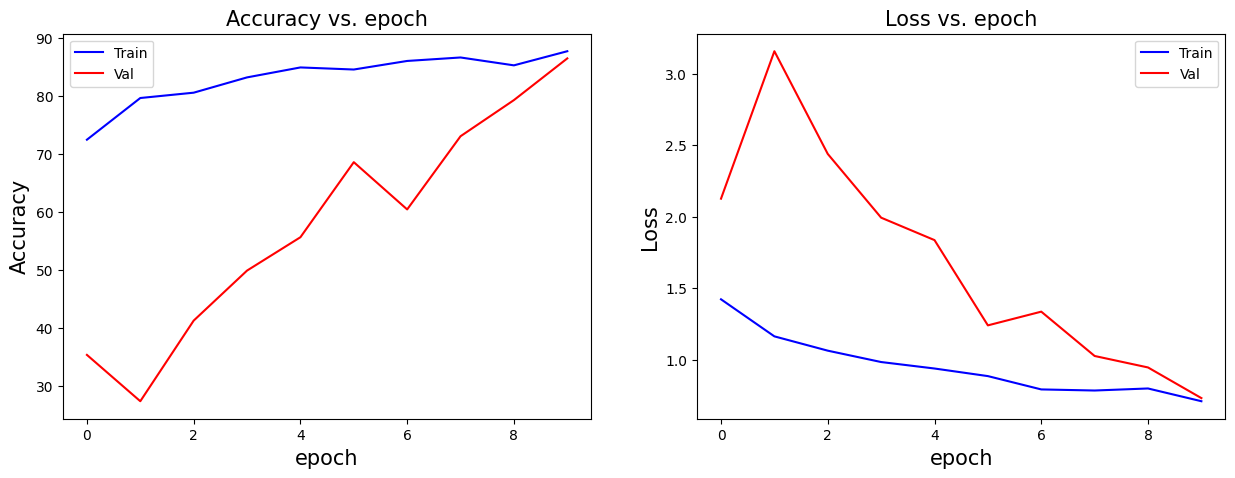

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Prediction on test dataset

In [ ]:
# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 705ms/step

Test Accuracy: 26.78%



## Modification 5 :
Data Augmentation

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.1),
    layers.RandomContrast(factor=0.1),
], name="data_augmentation")


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# Apply augmentation to train_ds and store in train_ds1
train_ds1 = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                         num_parallel_calls=AUTOTUNE)
train_ds1 = train_ds1.prefetch(buffer_size=AUTOTUNE)

# Prefetch validation dataset (no augmentation)
val_ds1 = val_ds.prefetch(buffer_size=AUTOTUNE)



In [ ]:
model = rev_model2()
model.summary()



Model: "model_cnn_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 256)            │             

 Total params: 462,436 (1.76 MB)

 Trainable params: 460,932 (1.76 MB)

 Non-trainable params: 1,504 (5.88 KB)

In [ ]:
model_fit = compile_train_v2(model, train_ds1, val_ds1, epochs=10)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.2516 - loss: 2.6669 - val_accuracy: 0.2663 - val_loss: 1.9691 - learning_rate: 0.0010
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 285s 4s/step - accuracy: 0.2636 - loss: 2.4247 - val_accuracy: 0.2711 - val_loss: 2.0333 - learning_rate: 0.0010
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.2606 - loss: 2.3310 - val_accuracy: 0.2663 - val_loss: 1.9408 - learning_rate: 0.0010
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.2597 - loss: 2.2375 - val_accuracy: 0.2711 - val_loss: 1.9154 - learning_rate: 0.0010
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 285s 4s/step - accuracy: 0.2562 - loss: 2.1186 - val_accuracy: 0.4737 - val_loss: 1.8676 - learning_rate: 0.0010
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 327s 4s/step - accuracy: 0.3041 - loss: 1.9653 - val_accuracy: 0.2663 - val_loss: 2.0155 - learning_rate: 0.0010
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 285s 4s/step - accuracy: 0.2993 - loss: 1.9026 - val_acc

## Plot Accuracy

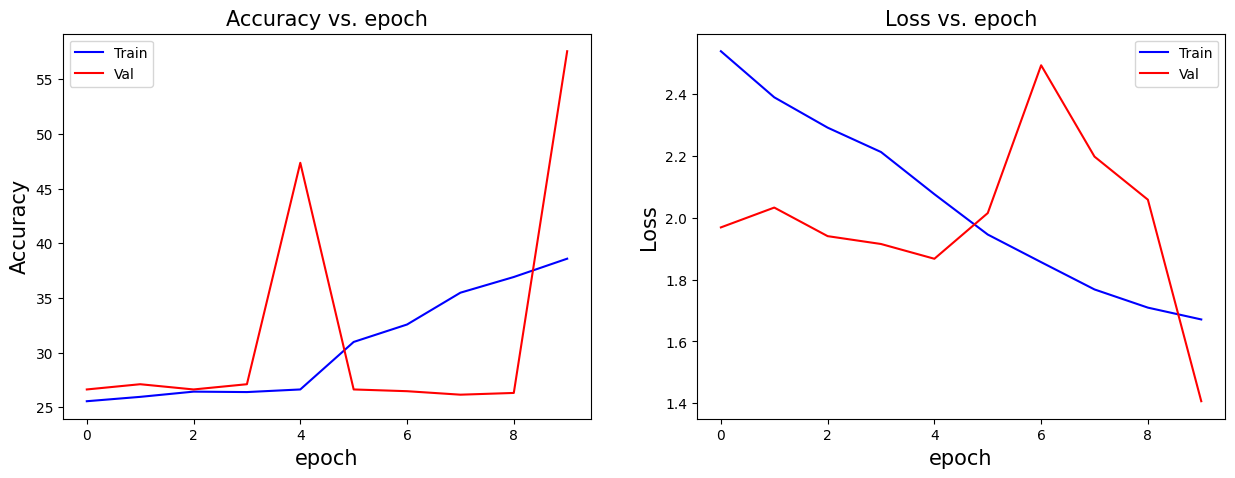

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

## Prediction on test dataset

In [ ]:
# Predict
y_pred = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred, axis=1)

# True labels (convert one-hot to class index)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# Accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 835ms/step

Test Accuracy: 24.22%



## Transfer Learning

### VGG16

In [ ]:
# --- IMPORTS ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# --- PREFETCH ---
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# --- VGG16 BASE ---
base_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# --- MODEL BUILDING ---
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])



In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,068 (56.64 MB)

 Trainable params: 132,868 (519.02 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

In [ ]:
# --- TRAINING ---
model.fit(train_ds, validation_data=val_ds, epochs=10)



Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1910s 24s/step - accuracy: 0.4154 - loss: 1.5520 - val_accuracy: 0.6140 - val_loss: 1.1019
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.6825 - loss: 0.8001 

In [ ]:
# --- Predict on test set ---
y_pred_probs = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred_probs, axis=1)

# --- Extract true labels from test_ds ---
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# --- Accuracy ---
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f"\nTest Accuracy: {test_acc:.2f}%")



In [ ]:
# --- Classification Report ---
print("\nClassification Report:")
print(metrics.classification_report(true_categories, predicted_categories))

# --- Confusion Matrix ---
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ResNet50

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# --- RESNET50 BASE ---
base_model = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# --- MODEL BUILDING ---
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])



In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()



In [ ]:
# --- TRAINING ---
model.fit(train_ds, validation_data=val_ds, epochs=10)



In [ ]:
# --- Predict on test set ---
y_pred_probs = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred_probs, axis=1)

# --- Extract true labels from test_ds ---
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# --- Accuracy ---
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f"\nTest Accuracy: {test_acc:.2f}%")



In [ ]:
# --- Classification Report ---
print("\nClassification Report:")
print(metrics.classification_report(true_categories, predicted_categories))

# --- Confusion Matrix ---
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### MobileNetV2

In [ ]:
# --- PREFETCH ---
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# --- MOBILENETV2 BASE ---
base_model = applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# --- MODEL BUILDING ---
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])



In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()



In [ ]:
# --- TRAINING ---
model.fit(train_ds, validation_data=val_ds, epochs=10)


In [ ]:
# --- Predict on test set ---
y_pred_probs = model.predict(test_ds)
predicted_categories = tf.argmax(y_pred_probs, axis=1)

# --- Extract true labels from test_ds ---
true_categories = tf.concat([y for x, y in test_ds], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

# --- Accuracy ---
test_acc = metrics.accuracy_score(true_categories, predicted_categories) * 100
print(f"\nTest Accuracy: {test_acc:.2f}%")



In [ ]:
# --- Classification Report ---
print("\nClassification Report:")
print(metrics.classification_report(true_categories, predicted_categories))

# --- Confusion Matrix ---
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()